<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Transfer-Learning-with-TensorFlow-Hub" data-toc-modified-id="Transfer-Learning-with-TensorFlow-Hub-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Transfer Learning with TensorFlow Hub</a></span><ul class="toc-item"><li><span><a href="#TakeAways" data-toc-modified-id="TakeAways-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>TakeAways</a></span></li><li><span><a href="#Transfer-Learning-of-a-Flower-Dataset" data-toc-modified-id="Transfer-Learning-of-a-Flower-Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Transfer Learning of a Flower Dataset</a></span><ul class="toc-item"><li><span><a href="#Inference-on-a-New-dataset" data-toc-modified-id="Inference-on-a-New-dataset-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Inference on a New dataset</a></span></li><li><span><a href="#Downloading-a-headless-model" data-toc-modified-id="Downloading-a-headless-model-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Downloading a headless model</a></span></li><li><span><a href="#Retrain-the-Model" data-toc-modified-id="Retrain-the-Model-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Retrain the Model</a></span></li><li><span><a href="#Unfreeze-and-train-one-more-epoch" data-toc-modified-id="Unfreeze-and-train-one-more-epoch-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Unfreeze and train one more epoch</a></span></li><li><span><a href="#Check-Predictions" data-toc-modified-id="Check-Predictions-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Check Predictions</a></span></li><li><span><a href="#Save-Model" data-toc-modified-id="Save-Model-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Save Model</a></span></li></ul></li></ul></li><li><span><a href="#Application:-Predicting-Dog-Moods" data-toc-modified-id="Application:-Predicting-Dog-Moods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Application: Predicting Dog Moods</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Potential-Improvements" data-toc-modified-id="Potential-Improvements-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Potential Improvements</a></span><ul class="toc-item"><li><span><a href="#Improvement-1:-Removing-Noisy-Images" data-toc-modified-id="Improvement-1:-Removing-Noisy-Images-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Improvement 1: Removing Noisy Images</a></span></li></ul></li></ul></li></ul></div>

# Transfer Learning with TensorFlow Hub

## TakeAways
- You can train a new model with transfer learning by grabbing a headless model from Tensorflow Hub. 
- You can abstract the entire pretrained model into a Keras layer with `hub.KerasLayer(modelURL)` (Note CNNs can have a variable sized input)
- `tf.keras.preprocessing.image.ImageDataGenerator()` is very useful
- Unfreeze a particular Sequential model layer with `model.get_layer(index=0).trainable=True`


[TF-Hub Doc](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub)

In [1]:
#!pip install --upgrade pip
#!pip install --upgrade tensorflow-hub

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import PIL.Image as Image


IMAGE_SHAPE = (224, 224)

In [6]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape = IMAGE_SHAPE+(3,))
])

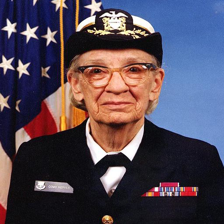

In [4]:
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [7]:
grace_hopper = np.array(grace_hopper)/255.
grace_hopper.shape

(224, 224, 3)

In [9]:
grace_hopper[np.newaxis,...].shape

(1, 224, 224, 3)

In [12]:
result = classifier.predict(grace_hopper[np.newaxis,...])
result.shape

(1, 1001)

In [14]:
pred_class = np.argmax(result[0], axis=-1)
pred_class

653

In [15]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


In [16]:
imagenet_labels[653]

'military uniform'

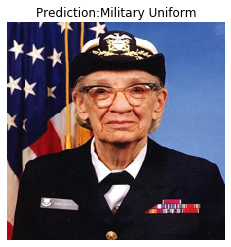

In [17]:
plt.imshow(grace_hopper)
plt.axis('off')
_ = plt.title("Prediction:"+imagenet_labels[pred_class].title())

## Transfer Learning of a Flower Dataset

### Inference on a New dataset

In [18]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228818944/228813984 [==============================] - 12s 0us/step


In [23]:
data_root

'C:\\Users\\harri\\.keras\\datasets\\flower_photos'

In [28]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
image_data = image_generator.flow_from_directory(data_root, target_size=IMAGE_SHAPE)
#default batch size is 32
#iterates image_batch, labels
# dimensions (32, w, h, c), (32,num_classes)

Found 3670 images belonging to 5 classes.


In [29]:
for image_batch, label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break
result_batch = classifier.predict(image_batch)
print(result_batch.shape)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)
(32, 1001)


In [30]:
print("Predicted class names: ", imagenet_labels[np.argmax(result_batch, axis=-1)])

Predicted class names:  ['daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'hair slide' 'picket fence'
 'barn spider' 'pillow' 'daisy' 'daisy' 'daisy' 'artichoke' 'sea urchin'
 'water buffalo' 'picket fence' 'broccoli' 'bee' 'greenhouse'
 'picket fence' 'daisy' 'picket fence' 'ant' 'mushroom' 'daisy' 'buckeye'
 'picket fence' 'cardoon' 'stingray' 'chickadee' 'coral fungus'
 'dragonfly']


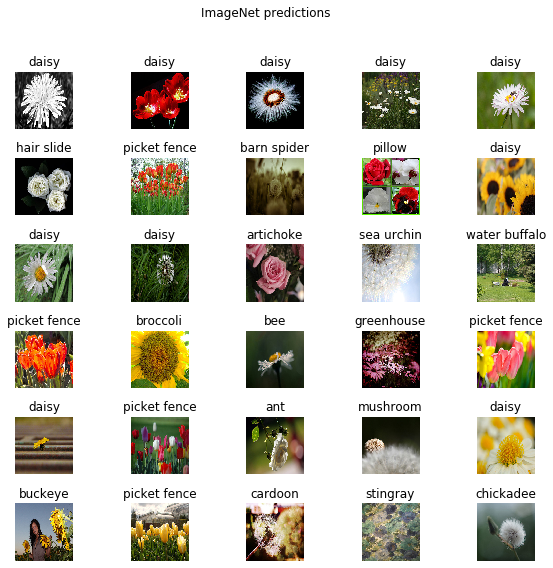

In [34]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(predicted_class_names[n])
    plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

### Downloading a headless model

In [35]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}
feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape = IMAGE_SHAPE+(3,))
feature_extractor_layer.trainable = False

In [36]:
model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(image_data.num_classes, activation= 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


### Retrain the Model

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss = 'categorical_crossentropy',
             metrics=['acc'])

In [38]:
class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_loss = []
        self.batch_acc = []
    def on_train_batch_end(self, batch, logs=None):
        self.batch_loss.append(logs['loss'])
        self.batch_acc.append(logs['acc'])
        self.model.reset_metrics()

In [40]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stat_callback = CollectBatchStats()
history = model.fit_generator(image_data, 
                              epochs=2, 
                              steps_per_epoch=steps_per_epoch,
                             callbacks = [batch_stat_callback])

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 115.0 steps
Epoch 1/2
115/115 [==============================] - 25s 218ms/step - loss: 0.6601 - acc: 0.9062
Epoch 2/2
115/115 [==============================] - 19s 166ms/step - loss: 0.3331 - acc: 0.9375


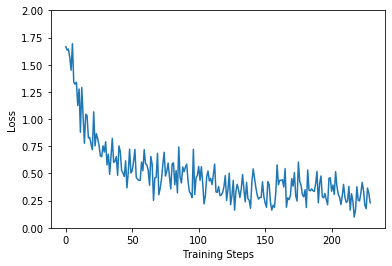

In [44]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stat_callback.batch_loss)
plt.show()

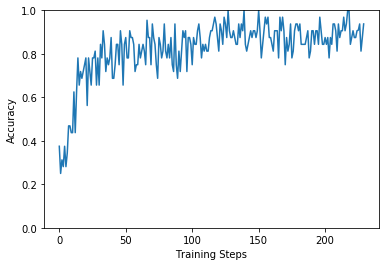

In [45]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stat_callback.batch_acc)
plt.show()

### Unfreeze and train one more epoch

In [48]:
model.get_layer(index=0).trainable=True

In [49]:
history = model.fit_generator(image_data, 
                              epochs=1, 
                              steps_per_epoch=steps_per_epoch,
                             callbacks = [batch_stat_callback])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 115.0 steps
115/115 [==============================] - 19s 164ms/step - loss: 0.2632 - acc: 1.0000


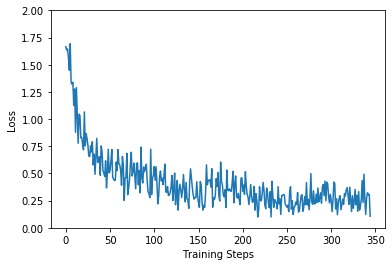

In [50]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stat_callback.batch_loss)
plt.show()

### Check Predictions

In [51]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

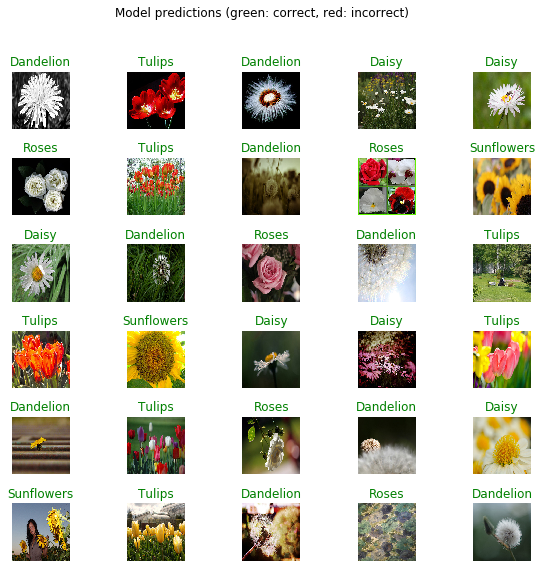

In [52]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch, axis=-1)


plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    color = "green" if predicted_id[n] == label_id[n] else "red"
    plt.title(predicted_label_batch[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

### Save Model

In [59]:
import time
import os

In [62]:
t = time.time()
#
exp_path = 'C://Users/harri/.keras/models/saved_models'
model.save(exp_path, save_format='tf')

INFO:tensorflow:Assets written to: C://Users/harri/.keras/models/saved_models\assets


INFO:tensorflow:Assets written to: C://Users/harri/.keras/models/saved_models\assets


In [63]:
reloaded = tf.keras.models.load_model(exp_path)

In [64]:
result_batch = model.predict(image_batch)
reloaded_result_batch = reloaded.predict(image_batch)

# Application: Predicting Dog Moods

## Summary
5 classes to predict: Happy, Bad Dog, Sad, Mad, and Pooping

In [4]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import PIL.Image as Image


IMAGE_SHAPE = (224, 224)

data_dir = "E://Data/Dog_moods"
NUM_CLASSES = 5
LABELS = np.array(['Bad_Dog', 'Happy', "Mad","Pooping", "Sad"])

In [5]:
list_ds = tf.io.gfile.glob(str(data_dir)+'*/*.jpg')
for z in list_ds:
    z.replace('\\\\','\\')
    try:
        im = Image.open(str(z))
    except:
        print("removing:")
        os.remove(z)

In [6]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,
                                                        validation_split=0.2)

valid_generator = valid_datagen.flow_from_directory(data_dir,
                                                    batch_size=32,
                                                    target_size=IMAGE_SHAPE,
                                                   subset='validation',
                                                    interpolation='bilinear')

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=30,
      horizontal_flip=True,
      width_shift_range=0.1, 
    height_shift_range=0.1,
      shear_range=0.2, 
    zoom_range=0.2,
      rescale=1/255., 
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(data_dir,
                                                   subset='training',
                                                   target_size=IMAGE_SHAPE,
                                                   interpolation='bilinear')


Found 434 images belonging to 5 classes.
Found 1744 images belonging to 5 classes.


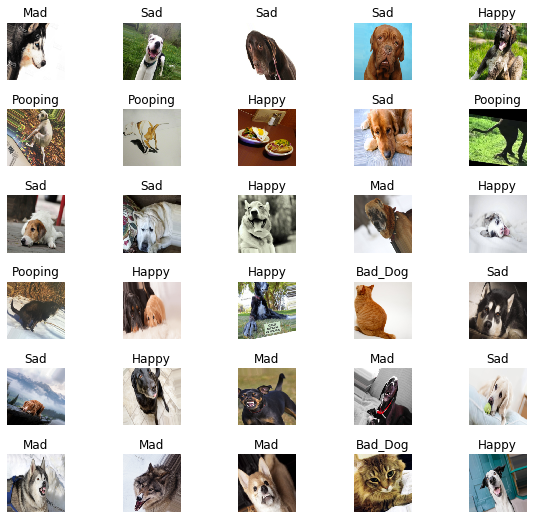

In [6]:
image_batch, label_batch = train_generator.next()
class_names = LABELS[np.argmax(label_batch, axis=-1)]

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(class_names[n])
    plt.axis('off')

In [7]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}
feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape = IMAGE_SHAPE+(3,))
feature_extractor_layer.trainable = True

model = tf.keras.Sequential([feature_extractor_layer,
                             tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')]
                            )

model.build(input_shape=IMAGE_SHAPE+(3,))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 2,230,277
Non-trainable params: 34,112
_________________________________________________________________


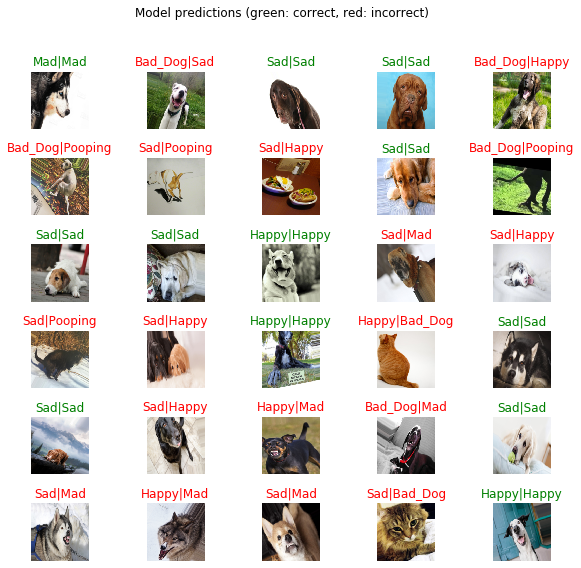

In [8]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = LABELS[predicted_id]
label_id = np.argmax(label_batch, axis=-1)


plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    color = "green" if predicted_id[n] == label_id[n] else "red"
    plt.title(predicted_label_batch[n].title()+"|"+LABELS[label_id][n], color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [9]:
model.compile(
optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [10]:
steps_per_epoch = train_generator.samples//train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size
hist = model.fit(
    train_generator,
    epochs=5, steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps).history

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 54 steps, validate for 13 steps
Epoch 1/5
24/54 [============>.................] - ETA: 53s - loss: 1.2495 - accuracy: 0.5885

C:\Users\harri\Anaconda3\envs\deep-learning\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


54/54 [==============================] - 100s 2s/step - loss: 1.1715 - accuracy: 0.6046 - val_loss: 1.8949 - val_accuracy: 0.6875
Epoch 2/5
54/54 [==============================] - 84s 2s/step - loss: 0.8083 - accuracy: 0.7310 - val_loss: 1.1899 - val_accuracy: 0.7356
Epoch 3/5
54/54 [==============================] - 84s 2s/step - loss: 0.6958 - accuracy: 0.7861 - val_loss: 1.8939 - val_accuracy: 0.6635
Epoch 4/5
54/54 [==============================] - 88s 2s/step - loss: 0.6725 - accuracy: 0.7948 - val_loss: 1.9267 - val_accuracy: 0.6106
Epoch 5/5
54/54 [==============================] - 84s 2s/step - loss: 0.5799 - accuracy: 0.8261 - val_loss: 1.6920 - val_accuracy: 0.6587


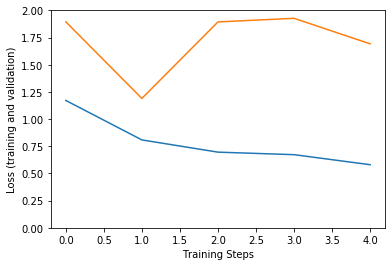

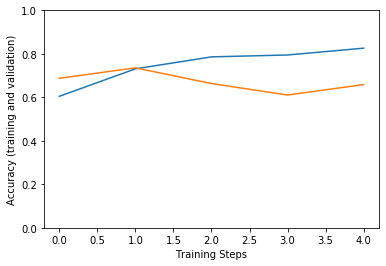

In [11]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

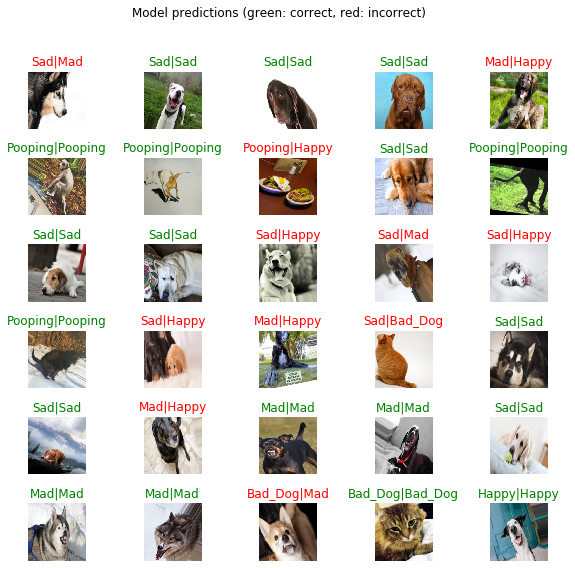

In [12]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = LABELS[predicted_id]
label_id = np.argmax(label_batch, axis=-1)


plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    color = "green" if predicted_id[n] == label_id[n] else "red"
    plt.title(predicted_label_batch[n].title()+"|"+LABELS[label_id][n], color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [15]:
model.save('C://Users/harri/.keras/models/saved_models/mobilenet_v2_dog_emotions_2-4-20/', save_format='tf')

INFO:tensorflow:Assets written to: C://Users/harri/.keras/models/saved_models/mobilenet_v2_dog_emotions_2-4-20/assets


INFO:tensorflow:Assets written to: C://Users/harri/.keras/models/saved_models/mobilenet_v2_dog_emotions_2-4-20/assets


## Potential Improvements
- Monitor GPU Utilization - see whether Disk I/O is taking up all the time
- Optimize the Dataset API to make the image loading faster
- Figure out best practice for discriminative learning rate
- Best practives for transfer learning (and model regularization)
- Label Smoothing
- Prefetching data Asynchronously?
- Save model to disk (The API is too quirky, whats the best way to do this?)
- Can we do a review of the models on TF Hub?

### Improvement 1: Removing Noisy Images
Get the images that produce the top loss and validate that they have pictures of dogs.

In [3]:
model = tf.keras.models.load_model('C://Users/harri/.keras/models/saved_models/mobilenet_v2_dog_emotions_2-4-20/')

In [15]:
def show_mispredictions(model, train_generator, num_to_show):
    plt.figure(figsize=(10,9))
    plt.subplots_adjust(hspace=0.5)
    i, n = 0, 0 
    while i<num_to_show:
        if n>train_generator.batch_size:
            idx = (train_generator.batch_index - 1) * train_generator.batch_size
            filenames = train_generator.filenames[idx : idx + train_generator.batch_size]

            predicted_batch = model.predict(image_batch)
            predicted_id = np.argmax(predicted_batch, axis=-1)
            predicted_label_batch = LABELS[predicted_id]
            label_id = np.argmax(label_batch, axis=-1)




        if predicted_id[n] == label_id[n]:
            n+=1
            continue

        plt.subplot(6,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(predicted_label_batch[n].title()+"|"+LABELS[label_id][n])
        plt.axis('off')
        i+=1
    _ = plt.suptitle("Model mispredictions")
    return plt.show()

show_mispredictions(model, train_generator)     

NameError: name 'image_batch' is not defined